Anchor Boxes Identification Using K Mean
-------------------------------------------------------------


Input 
---------
The Input to this program is a text file which contains the following
1. Class of Image
2. Image Height
3. Image Width 
4. Bounding Box 

   a) Top Left X Position
   
   b) Top Left Y Position
   
   c) Width of Bounding Box
   
   d) Height of Bounding Box

Output
----------
The Coordinates of the Centroid of Anchor Boxes based on the Number of clusters given

In [111]:
# Read the Given input text file

import pandas as pd
annotation_data = pd.read_csv(r"C:\Users\nihar\Downloads\\sample_coco.txt",
                             sep=", ")

C:\Users\nihar\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


# Read the Input file for the coordinates

In [112]:
input_file = open(r"C:\Users\nihar\Downloads\\sample_coco.txt")  

# Prepare Data for Training 

Read each line of input file and create lists for 

1. Class of Image
2. Image Height
3. Image Width
4. Bounding Box

   a) Top Left X Position 
    
   b) Top Left Y Position 

   c) Width of Bounding Box 
    
   d) Height of Bounding Box

In [85]:
image_class_list   = []
image_height_list  = []
image_width_list   = []

bb_x         = []
bb_y         = []
bb_width     = []
bb_height    = [] 


for record in input_file:
    rec_list = record.split(',')
    image_class_list.append(int(rec_list[0][4:]))
    image_height_list.append(int(rec_list[1][8:]))
    image_width_list.append(int(rec_list[2][7:]))
    bb_x.append(int(rec_list[3][7:]))
    bb_y.append(int(rec_list[4].strip()))
    bb_width.append(int(rec_list[5].strip()))
    bb_height.append(int(rec_list[6][:-1].strip()))

# Check to ensure all records are read

In [114]:
len(image_class_list),len(image_width_list),len(image_height_list),len(bb_x),len(bb_y),len(bb_width),len(bb_height)

(10105, 10105, 10105, 10105, 10105, 10105, 10105)

# Prepare a Dictionary to keep the class as key and count as value

In [103]:
class_freq= {}
class_set = set(image_class_list)
for class_val in class_set:
    class_freq[class_val]= image_class_list.count(class_val)

# Plot Frequency Distribution chart for each class

Text(0, 0.5, 'Count')

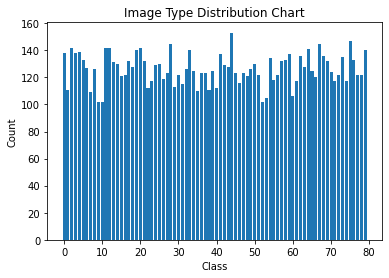

In [115]:
keys = class_freq.keys()
values = class_freq.values()
plt.bar(keys, values)

plt.title("Image Type Distribution Chart")
plt.xlabel("Class")
plt.ylabel("Count")

# Prepare Data for Training 

1. Read the Width and Height of image
2. Normalize the image 


In [117]:
width= []
height = []
width_norm = []
height_norm = []

for i in  range(len(image_class)):
  
  img_height =image_height_list[i]
  img_width=image_width_list[i]
  
  bb_w= bb_width[i]
  bb_h= bb_height[i]
  width.append(bb_w)
  height.append(bb_h)
  
  width_norm.append(bb_w/img_width)
  height_norm.append(bb_h/img_height)
  

# Let's validate to ensure everything looks fine 

In [119]:
import numpy as np
width_array  = np.array(width)
print(width_array)

[312  83 267 ... 297 271 320]


In [120]:
width_norm_array = np.array(width_norm)
print(width_norm_array)

[0.28545288 0.18906606 0.32129964 ... 0.44661654 0.41500766 0.62868369]


In [121]:
height_norm_array = np.array(height_norm)
print(height_norm_array)

[0.53030303 0.2544757  0.25891473 ... 0.38109306 0.29113924 0.32366589]


In [91]:
X = np.column_stack((width_norm_array,height_norm_array))

In [92]:
X[:3]

array([[0.28545288, 0.53030303],
       [0.18906606, 0.2544757 ],
       [0.32129964, 0.25891473]])

# Plot the values and see the distribution 

In [122]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

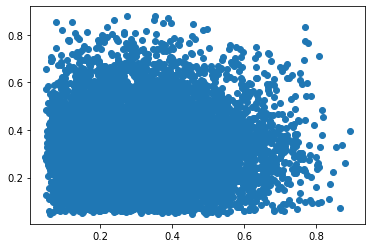

In [123]:
plt.scatter(X[:,0], X[:,1])

# Function to Define K mean Clustering 

In [129]:
def draw_chart(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    pred_y = kmeans.fit_predict(X)
    plt.scatter(X[:,0], X[:,1])
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
    plt.show()
    print(" The Centroid of the Anchor Boxes for " , n_clusters , " clusters")
    print(kmeans.cluster_centers_)
    print('-'*100)

# Let's Run the algorith for multiple number of clusters 

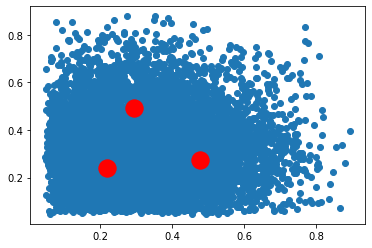

 The Centroid of the Anchor Boxes for  3  clusters
[[0.21808862 0.23992734]
 [0.47845166 0.27415007]
 [0.29415167 0.49028161]]
----------------------------------------------------------------------------------------------------


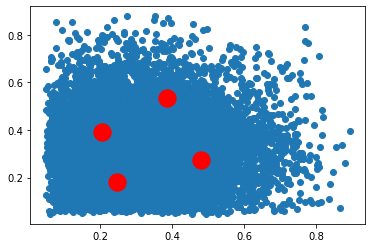

 The Centroid of the Anchor Boxes for  4  clusters
[[0.48039999 0.27216026]
 [0.2051795  0.38941535]
 [0.2465304  0.18169721]
 [0.38567446 0.53267178]]
----------------------------------------------------------------------------------------------------


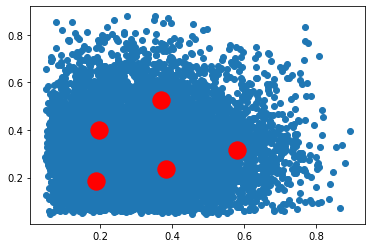

 The Centroid of the Anchor Boxes for  5  clusters
[[0.3694134  0.52645624]
 [0.19569039 0.40160753]
 [0.38165884 0.23765644]
 [0.18873836 0.18674727]
 [0.58115784 0.31787939]]
----------------------------------------------------------------------------------------------------


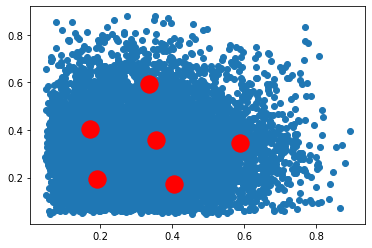

 The Centroid of the Anchor Boxes for  6  clusters
[[0.58733195 0.34421703]
 [0.17048974 0.40305196]
 [0.19006843 0.19288712]
 [0.40408074 0.17250223]
 [0.35610559 0.35966085]
 [0.33583787 0.59193606]]
----------------------------------------------------------------------------------------------------


In [130]:
for value in [3,4,5,6]:
    draw_chart(value)

# WCSS Plot

An ideal way to figure out the right number of clusters would be to calculate the Within-Cluster-Sum-of-Squares (WCSS). WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids.

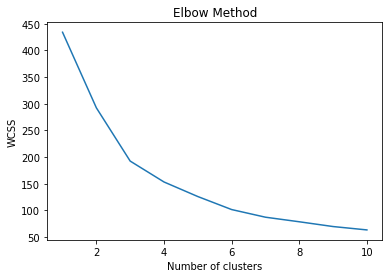

In [109]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()